# **Bayesian Inference and Global Terrorism**

**Introduction:**
The Global Terrorism Database (GTD) is a database on terrorist attacks around the world from 1970 through 2016 containing over 150,000 observations. Researchers at the National Consortium maintain the database for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. While their team there has done an excellent job in compiling this data there are some glaring problems with the data. Perhaps the most prevalent issues are adapting to new countries, filling in missing data, unnecessary columns, and most notably and as such is the subject of our project 1993 is omitted. 

**Note on Country Names**

While it is important to differentiate between country names, like Rhodesia and Zimbabwe, when looking at the history of a country for the sake of this dataset since they share everything, but their pre and postcolonial name I would highly suggest  

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
data=pd.read_csv('./globalterrorismdb_0617dist.csv')

In [67]:
pd.set_option('max_columns', 135)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

# EDA

In [68]:
#Ritika EDA
def eda(dataframe):
    print "Missing Values \n \n", dataframe.isnull().sum(),"\n" #find missing values
    print "Duplicate Rows \n", dataframe.duplicated().sum(),"\n" #find duplicated values
    print "Dataframe Types \n \n", dataframe.dtypes,"\n" #datatypes of each column
    print "Dataframe Shape \n", dataframe.shape,"\n" #number of rows and columns
    print "Dataframe Describe \n \n", dataframe.describe(include='all'),"\n" #Describe all columns
    for feature in dataframe: # Prints unique values for each column 
        print feature
        print dataframe[feature].nunique()

In [69]:
eda(data)

Missing Values 
 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            162886
extended                   0
resolution            168131
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
location              122376
summary                66138
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            109805
propextent_txt        109805
propvalue             134

31300
target1
82975
natlty1
213
natlty1_txt
213
targtype2
22
targtype2_txt
22
targsubtype2
97
targsubtype2_txt
97
corp2
2474
target2
4790
natlty2
156
natlty2_txt
156
targtype3
20
targtype3_txt
20
targsubtype3
89
targsubtype3_txt
89
corp3
376
target3
665
natlty3
104
natlty3_txt
104
gname
3454
gsubname
1098
gname2
383
gsubname2
58
gname3
103
gsubname3
13
motive
13033
guncertain1
2
guncertain2
2
guncertain3
2
individual
2
nperps
112
nperpcap
50
claimed
3
claimmode
10
claimmode_txt
10
claim2
3
claimmode2
9
claimmode2_txt
9
claim3
2
claimmode3
8
claimmode3_txt
8
compclaim
3
weaptype1
12
weaptype1_txt
12
weapsubtype1
29
weapsubtype1_txt
29
weaptype2
11
weaptype2_txt
11
weapsubtype2
28
weapsubtype2_txt
28
weaptype3
10
weaptype3_txt
10
weapsubtype3
23
weapsubtype3_txt
23
weaptype4
5
weaptype4_txt
5
weapsubtype4
16
weapsubtype4_txt
16
weapdetail
18246
nkill
199
nkillus
30
nkillter
90
nwound
233
nwoundus
44
nwoundte
42
property
3
propextent
4
propextent_txt
4
propvalue
640
propcomment
18344
isho

In [70]:
data.iyear.value_counts(sort=False)

1970      651
1971      470
1972      496
1973      473
1974      580
1975      740
1976      923
1977     1319
1978     1526
1979     2661
1980     2662
1981     2585
1982     2545
1983     2870
1984     3495
1985     2915
1986     2860
1987     3184
1988     3720
1989     4323
1990     3887
1991     4683
1992     5073
1994     3458
1995     3081
1996     3056
1997     3200
1998      933
1999     1395
2000     1813
2001     1907
2002     1332
2003     1262
2004     1162
2005     2009
2006     2749
2007     3241
2008     4803
2009     4719
2010     4822
2011     5071
2012     8500
2013    11996
2014    16860
2015    14852
2016    13488
Name: iyear, dtype: int64

In [71]:
data.columns

Index([u'eventid', u'iyear', u'imonth', u'iday', u'approxdate', u'extended',
       u'resolution', u'country', u'country_txt', u'region',
       ...
       u'addnotes', u'scite1', u'scite2', u'scite3', u'dbsource', u'INT_LOG',
       u'INT_IDEO', u'INT_MISC', u'INT_ANY', u'related'],
      dtype='object', length=135)

In [72]:
#renaming columns
data = data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country name', 'provstate':'state', 'targtype1_txt':'target',
             'weaptype1_txt':'weapon', 'nkill':'fatalities', 'nwound':'injuries','region_txt':"region name"})

In [73]:
#columns dropped based upon initial reading of dataset documentation
data.drop(['attacktype2','attacktype2_txt','attacktype3','attacktype3_txt'],axis=1, inplace=True)
data.drop(['scite1','scite2','scite3','dbsource','ransomnote'],axis=1, inplace=True)
data.drop(['summary','addnotes','propcomment','location'],axis=1, inplace=True)

In [74]:
data.shape

(170350, 122)

In [75]:
#2nd EDA
eda(data)

Missing Values 
 
id                         0
year                       0
month                      0
day                        0
approxdate            162886
extended                   0
resolution            168131
country                    0
country name               0
region                     0
region name                0
state                  14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
targtype1                  0
target                     0
                       ...  
fatalities              9682
nkillus                64459
nkillter               66

20
targtype3_txt
20
targsubtype3
89
targsubtype3_txt
89
corp3
376
target3
665
natlty3
104
natlty3_txt
104
gname
3454
gsubname
1098
gname2
383
gsubname2
58
gname3
103
gsubname3
13
motive
13033
guncertain1
2
guncertain2
2
guncertain3
2
individual
2
nperps
112
nperpcap
50
claimed
3
claimmode
10
claimmode_txt
10
claim2
3
claimmode2
9
claimmode2_txt
9
claim3
2
claimmode3
8
claimmode3_txt
8
compclaim
3
weaptype1
12
weapon
12
weapsubtype1
29
weapsubtype1_txt
29
weaptype2
11
weaptype2_txt
11
weapsubtype2
28
weapsubtype2_txt
28
weaptype3
10
weaptype3_txt
10
weapsubtype3
23
weapsubtype3_txt
23
weaptype4
5
weaptype4_txt
5
weapsubtype4
16
weapsubtype4_txt
16
weapdetail
18246
fatalities
199
nkillus
30
nkillter
90
injuries
233
nwoundus
44
nwoundte
42
property
3
propextent
4
propextent_txt
4
propvalue
640
ishostkid
3
nhostkid
202
nhostkidus
27
nhours
35
ndays
313
divert
143
kidhijcountry
217
ransom
3
ransomamt
395
ransomamtus
22
ransompaid
136
ransompaidus
8
hostkidoutcome
7
hostkidoutcome_txt
7
nrel

In [76]:
#inspection of approxdate to see what type of format data is in
data.approxdate.value_counts()

September 18-24, 2016              101
2016-12-01 00:00:00                 85
2016-05-29 00:00:00                 57
2016-07-22 00:00:00                 48
2016-08-08 00:00:00                 42
2016-06-05 00:00:00                 41
2016-10-23 00:00:00                 32
2016-03-22 00:00:00                 28
July 1-14, 2014                     27
2016-02-24 00:00:00                 26
2016-10-19 00:00:00                 22
2015-01-14 00:00:00                 22
2014-09-12 00:00:00                 21
2014-12-20 00:00:00                 20
2015-09-09 00:00:00                 20
2014-09-15 00:00:00                 20
2016-02-06 00:00:00                 20
2014-11-09 00:00:00                 19
2014-11-12 00:00:00                 19
2014-05-11 00:00:00                 19
2015-02-12 00:00:00                 18
2014-07-15 00:00:00                 17
2016-02-29 00:00:00                 17
2016-02-03 00:00:00                 17
2016-05-18 00:00:00                 17
2015-05-30 00:00:00      

In [77]:
#view columns
data.columns

Index([u'id', u'year', u'month', u'day', u'approxdate', u'extended',
       u'resolution', u'country', u'country name', u'region',
       ...
       u'ransompaid', u'ransompaidus', u'hostkidoutcome',
       u'hostkidoutcome_txt', u'nreleased', u'INT_LOG', u'INT_IDEO',
       u'INT_MISC', u'INT_ANY', u'related'],
      dtype='object', length=122)

In [78]:
#review null count in columns
pd.set_option('max_columns',-1)
data.isnull().sum()

id                         0
year                       0
month                      0
day                        0
approxdate            162886
extended                   0
resolution            168131
country                    0
country name               0
region                     0
region name                0
state                  14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
targtype1                  0
target                     0
                       ...  
fatalities              9682
nkillus                64459
nkillter               66663
injuries      

In [79]:
#after second review of eda missing values decided to drop columns whose missing values exceed 130,000 before third review of data
data.drop(['related','hostkidoutcome','hostkidoutcome_txt','nreleased','ransompaidus','ransompaid',
                   'ransomamt','kidhijcountry','divert','ndays','nhours','nhostkidus','nhostkid','alternative',
                    'alternative_txt','resolution'],axis=1,inplace=True)
data.drop(['targtype2_txt','targtype2'],axis=1,inplace=True)
data.drop(['corp2','targsubtype2_txt','targsubtype2'],axis=1,inplace=True)
data.drop(['natlty2_txt','natlty2','target2'],axis=1,inplace=True)
data.drop(['targsubtype3','targtype3_txt','targtype3'],axis=1,inplace=True)
data.drop(['target3','corp3','targsubtype3_txt'],axis=1,inplace=True)

In [80]:
data.drop(['gsubname','natlty3_txt','natlty3'],axis=1,inplace=True)
data.drop(['gsubname3','gname3','gsubname2','gname2'],axis=1, inplace=True)
data.drop(['propvalue','weaptype2','claimmode_txt','claimmode','guncertain3','guncertain2'],axis=1,inplace=True)
data.drop(['weapsubtype4_txt','weapsubtype4','weaptype4_txt','weapsubtype3_txt','weapsubtype3',
           'weaptype3_txt','weaptype3','weapsubtype2_txt','weapsubtype2','weaptype2_txt',
          'ransomamtus'],axis=1,inplace=True)
data.drop(['compclaim','claimmode3_txt','claimmode3','claim3','claimmode2_txt','claimmode2','claim2','weaptype4'],axis=1,inplace=True)
data.drop(['approxdate', 'propextent','propextent_txt'],axis=1,inplace=True)
data.drop(['motive','weapsubtype1','weapsubtype1_txt','ransom'],axis=1, inplace=True)
data.drop(['corp1','property','weapdetail','nwoundus','nkillus','weapdetail','nperpcap','claimed'],axis=1,inplace=True)
data.drop(['ishostkid'],axis=1,inplace=True)
data.drop(['nwoundte','state','nkillter'],axis=1,inplace=True)
data.drop(['gname','nperps','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'],axis=1, inplace=True)
# data.drop(['guncertain1'],axis=1,inplace=True)

#### **Dropping Columns**
As a result of the multiple null values, particularly those columns with over 20,000 null values, many columns were dropped. In addition, columns were also dropped if they were deemed unnecessary or not of interest. A caveat to this is that some of those columns did contain interesting information that could be looked into further, but for the purposes of this project there were dropped as they were deemed redundant.

In [81]:
pd.set_option('max_columns', None)
data.isnull().sum()

id                      0
year                    0
month                   0
day                     0
extended                0
country                 0
country name            0
region                  0
region name             0
city                  446
latitude             4606
longitude            4606
specificity             4
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
target                  0
targsubtype1         9345
targsubtype1_txt     9345
target1               634
natlty1              1394
natlty1_txt          1394
guncertain1           379
individual              0
weaptype1               0
weapon                  0
fatalities           9682
injuries            15325
dtype: int64

In [82]:
data.shape

(170350, 36)

In [83]:
#Setting up WeaponType6 DF
Bombingdf = data[data.weaptype1==6]
Bombingdf

,id,year,month,day,extended,country,country name,region,region name,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,target,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,guncertain1,individual,weaptype1,weapon,fatalities,injuries
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,37.983773,23.728157,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,NaN,NaN
7,197001020002,1970,1,2,0,217,United States,1,North America,Oakland,37.805065,-122.273024,1.0,0,1,1,1,1,0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Edes Substation,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
10,197001050001,1970,1,1,0,217,United States,1,North America,Baraboo,43.468500,-89.744299,1.0,0,1,1,0,1,0,0,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Badger Army ammo depot.,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
15,197001100001,1970,1,10,0,499,East Germany (GDR),9,Eastern Europe,East Berlin,52.516667,13.400000,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,2,Government (General),NaN,NaN,Jurists Ball (Palais au Frankturm),75.0,Germany,0.0,0,6,Explosives/Bombs/Dynamite,NaN,NaN
17,197001120001,1970,1,12,0,217,United States,1,North America,New York City,40.610069,-73.947971,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,8,Educational Institution,49.0,School/University/Educational Building,James Madison High School,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
18,197001120002,1970,1,12,0,217,United States,1,North America,Rio Grande,18.379998,-65.830948,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,1,Business,4.0,Multinational Corporation,General Electric factory in Rio Grande Puerto ...,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
22,197001190002,1970,1,19,0,217,United States,1,North America,Seattle,47.610594,-122.317228,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,8,Educational Institution,49.0,School/University/Educational Building,"Liberal Arts and Garrand buildings, Seattle Un...",217.0,United States,1.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
23,197001190003,1970,1,19,0,217,United States,1,North America,Seattle,47.655335,-122.303520,1.0,0,1,1,1,0,0,0,0,3,Bombing/Explosion,4,Military,28.0,Military Recruiting Station/Academy,Air Force R.O.T.C. at the University of Washin...,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
26,197001210001,1970,1,21,0,160,Philippines,5,Southeast Asia,Quezon City,14.677301,121.044348,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,JUSMAG HQ,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
28,197001220002,1970,1,22,0,217,United States,1,North America,South Sioux City,42.470310,-96.413949,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,76.0,House/Apartment/Residence,NaN,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0


In [84]:
Bombingdf.columns

Index([u'id', u'year', u'month', u'day', u'extended', u'country',
       u'country name', u'region', u'region name', u'city', u'latitude',
       u'longitude', u'specificity', u'vicinity', u'crit1', u'crit2', u'crit3',
       u'doubtterr', u'multiple', u'success', u'suicide', u'attacktype1',
       u'attacktype1_txt', u'targtype1', u'target', u'targsubtype1',
       u'targsubtype1_txt', u'target1', u'natlty1', u'natlty1_txt',
       u'guncertain1', u'individual', u'weaptype1', u'weapon', u'fatalities',
       u'injuries'],
      dtype='object')

In [85]:
eda(Bombingdf)

Missing Values 
 
id                     0
year                   0
month                  0
day                    0
extended               0
country                0
country name           0
region                 0
region name            0
city                 142
latitude            1404
longitude           1404
specificity            2
vicinity               0
crit1                  0
crit2                  0
crit3                  0
doubtterr              0
multiple               0
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
target                 0
targsubtype1        6479
targsubtype1_txt    6479
target1              358
natlty1              978
natlty1_txt          978
guncertain1          229
individual             0
weaptype1              0
weapon                 0
fatalities          3892
injuries            5633
dtype: int64 

Duplicate Rows 
0 

Dataframe Types 
 
id                    int64


In [86]:
#Set Up Dictionary by region name indexed by total number of attacks per year by region.
regions=data['region name'].unique()
dicti={}
for item in regions:
    dicti[item]=(data[data['region name']==item].groupby('year').attacktype1_txt.count())

In [87]:
#turn region name dictionary into data frame
regionattacks=pd.DataFrame.from_dict(dicti)
regionattacks

,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1.0,7.0,NaN,2.0,12.0,29,472,65,1.0,10,3.0,49
1971,1.0,5.0,NaN,1.0,4.0,55,247,24,NaN,6,2.0,125
1972,2.0,3.0,NaN,NaN,1.0,35,69,20,1.0,10,NaN,355
1973,1.0,6.0,NaN,2.0,1.0,19,64,83,1.0,2,4.0,290
1974,1.0,11.0,NaN,4.0,2.0,42,111,81,2.0,3,7.0,316
1975,NaN,9.0,NaN,12.0,NaN,44,159,55,4.0,7,12.0,438
1976,NaN,45.0,NaN,2.0,NaN,55,125,91,4.0,12,10.0,579
1977,NaN,24.0,NaN,4.0,2.0,211,149,119,2.0,8,29.0,771
1978,2.0,199.0,NaN,35.0,2.0,128,117,222,2.0,44,46.0,729


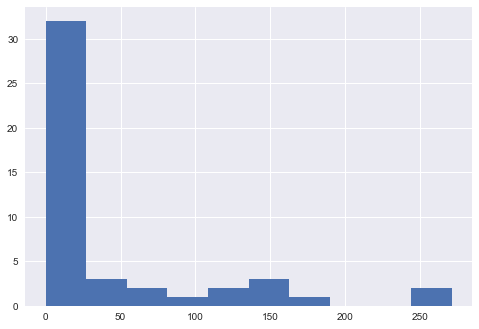

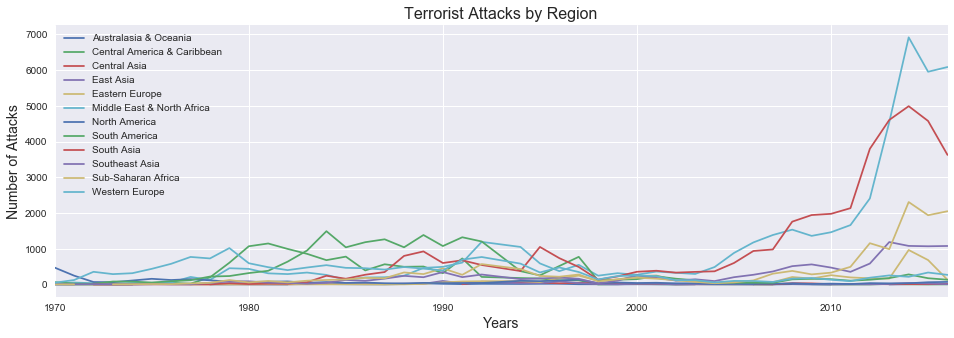

In [88]:
# Attacks per Region
regionattacks.plot(kind='line',figsize=[16,5])
plt.xlabel('Years', size=14)
plt.ylabel('Number of Attacks', size=14)
plt.title('Terrorist Attacks by Region', size=16)
plt.show()

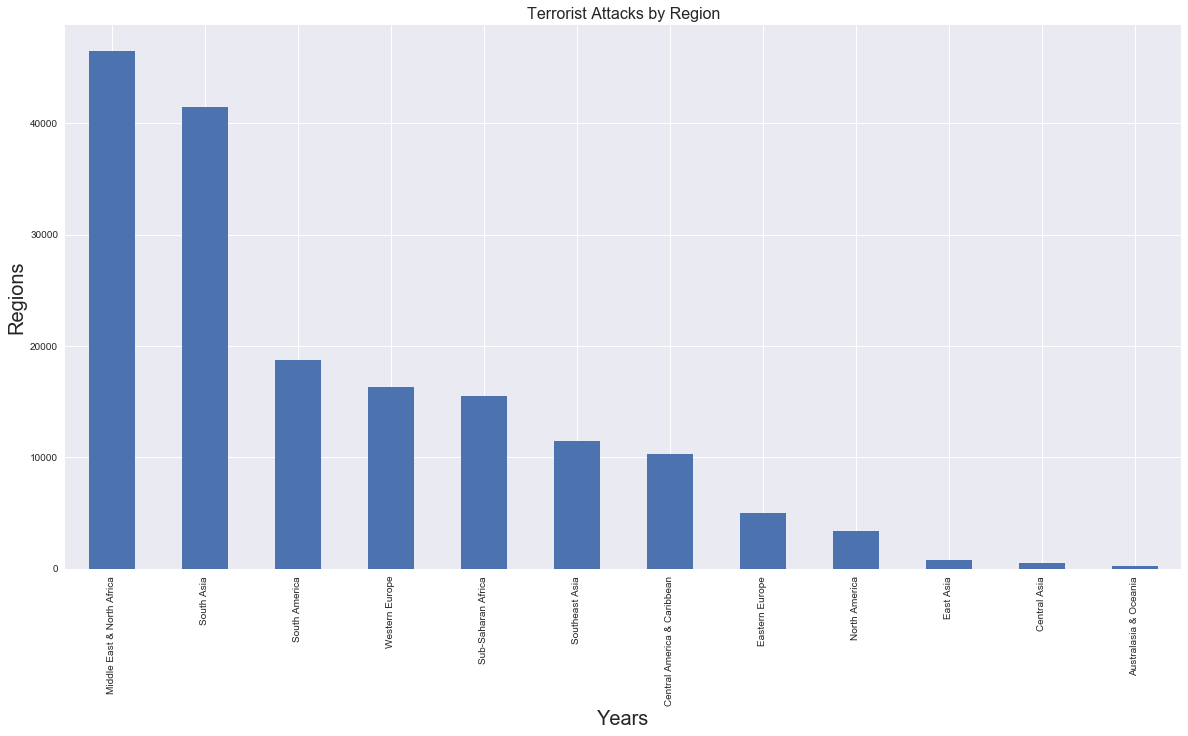

In [89]:
# Attacks per Region
data['region name'].value_counts().plot(kind='bar',figsize=[20,10])
plt.xlabel('Years', size=20)
plt.ylabel('Regions', size=20)
plt.title('Terrorist Attacks by Region', size=16)
plt.show()

In [90]:
data.year.value_counts()

2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
1992     5073
2011     5071
2010     4822
2008     4803
2009     4719
1991     4683
1989     4323
1990     3887
1988     3720
1984     3495
1994     3458
2007     3241
1997     3200
1987     3184
1995     3081
1996     3056
1985     2915
1983     2870
1986     2860
2006     2749
1980     2662
1979     2661
1981     2585
1982     2545
2005     2009
2001     1907
2000     1813
1978     1526
1999     1395
2002     1332
1977     1319
2003     1262
2004     1162
1998      933
1976      923
1975      740
1970      651
1974      580
1972      496
1973      473
1971      470
Name: year, dtype: int64

In [91]:
AttacksperYear=pd.DataFrame(data.year.value_counts())

In [92]:
AttacksperYear=data.year.value_counts().reset_index(inplace=False)

In [93]:
AttacksperYear.head()

,index,year
0,2014,16860
1,2015,14852
2,2016,13488
3,2013,11996
4,2012,8500


In [94]:
AttacksperYear.columns=['year','# of Attacks']

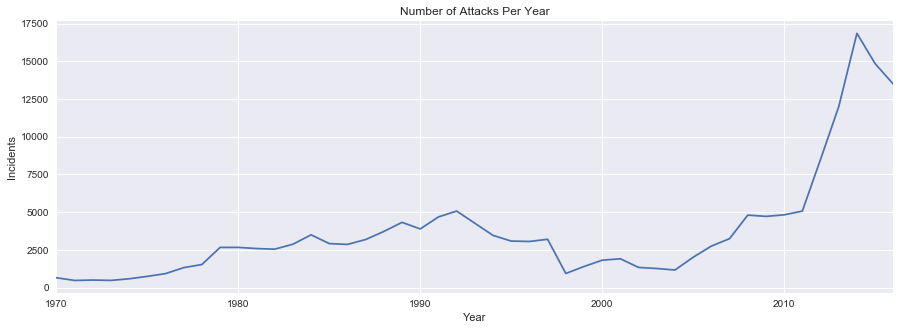

In [95]:
plt.figure(figsize=(15,5))
sns.tsplot(AttacksperYear['# of Attacks'],AttacksperYear['year'])
plt.title('Number of Attacks Per Year')
plt.ylabel('Incidents')
plt.xlabel('Year')
plt.show()

# Bombings Information

In [96]:
#Number of Bombings peryear
bombingsperyear=pd.DataFrame(Bombingdf.year.value_counts())
bombingsperyear=Bombingdf.year.value_counts().reset_index(inplace=False)

In [97]:
bombingsperyear.head()
bombingsperyear.columns=['year','# of Bombings']

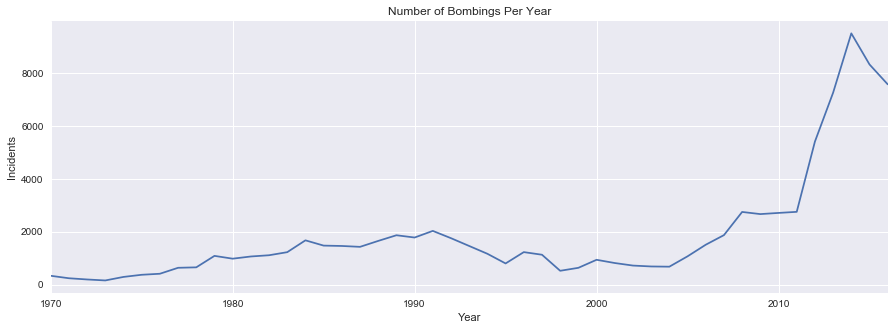

In [98]:
plt.figure(figsize=(15,5))
sns.tsplot(bombingsperyear['# of Bombings'],bombingsperyear['year'])
plt.title('Number of Bombings Per Year')
plt.ylabel('Incidents')
plt.xlabel('Year')
plt.show()

Looking further into the data I wanted to see if countries and/or regions that have a history of fighting with each other either through normal military means or through the use of terrorist actions had similar or apparent related incidents of terrorist attacks.

Those included are:
- The United Kingdom and Ireland 
    - An important note here is that a majority of the Troubles occurred in Northern Ireland which while on the island of Eire is part of the United Kingdom and not Ireland.

- India and Pakistan

- Countries of the Former Yugoslavia

- Russia and Ukraine

- Former USSR Countries (minus Ukraine as it has a disproportionate 
 amount of attacks making the chart unable to see the less frequent 
 attacks in other countries)

- Russia (including Soviet Union) vs. United States


In [99]:
data.columns

Index([u'id', u'year', u'month', u'day', u'extended', u'country',
       u'country name', u'region', u'region name', u'city', u'latitude',
       u'longitude', u'specificity', u'vicinity', u'crit1', u'crit2', u'crit3',
       u'doubtterr', u'multiple', u'success', u'suicide', u'attacktype1',
       u'attacktype1_txt', u'targtype1', u'target', u'targsubtype1',
       u'targsubtype1_txt', u'target1', u'natlty1', u'natlty1_txt',
       u'guncertain1', u'individual', u'weaptype1', u'weapon', u'fatalities',
       u'injuries'],
      dtype='object')

In [100]:
#Set Up Dictionary by region name indexed by total number of attacks per year by region.
countries=data['country name'].unique()
dicti1={}
for item in countries:
    dicti1[item]=(data[data['country name']==item].groupby('year').attacktype1_txt.count())

In [101]:
countries=pd.DataFrame.from_dict(dicti1)
countries

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,12.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1,3.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,12,468,33.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,1,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,81,247,8.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,1.0,NaN
1972,NaN,NaN,1.0,NaN,NaN,NaN,15.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,

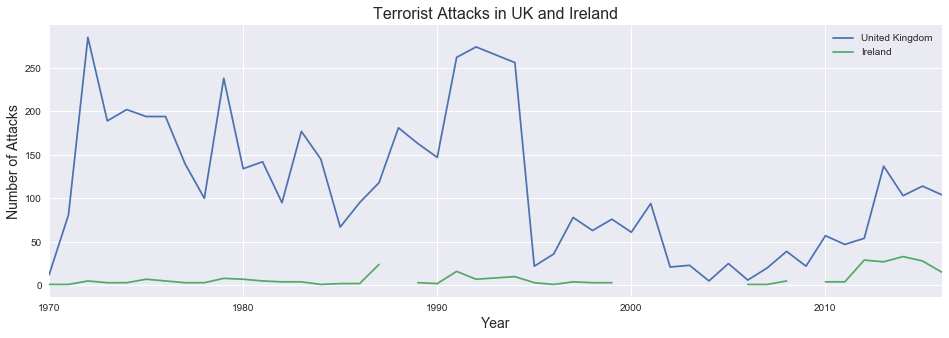

In [102]:
#Uk attacks
countries['United Kingdom'].plot(kind='line',figsize=[16,5])
countries['Ireland'].plot(kind='line',figsize=[16,5])
plt.xlabel('Year', size=14)
plt.ylabel('Number of Attacks', size=14)
plt.legend()
plt.title('Terrorist Attacks in UK and Ireland', size=16)
plt.show()

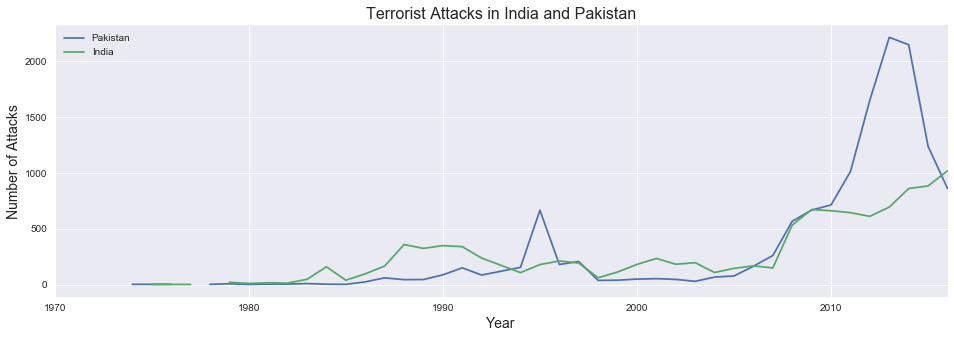

In [103]:
countries['Pakistan'].plot(kind='line',figsize=[16,5])
countries['India'].plot(kind='line',figsize=[16,5])
plt.xlabel('Year', size=14)
plt.ylabel('Number of Attacks', size=14)
plt.legend()
plt.title('Terrorist Attacks in India and Pakistan', size=16)
plt.show()

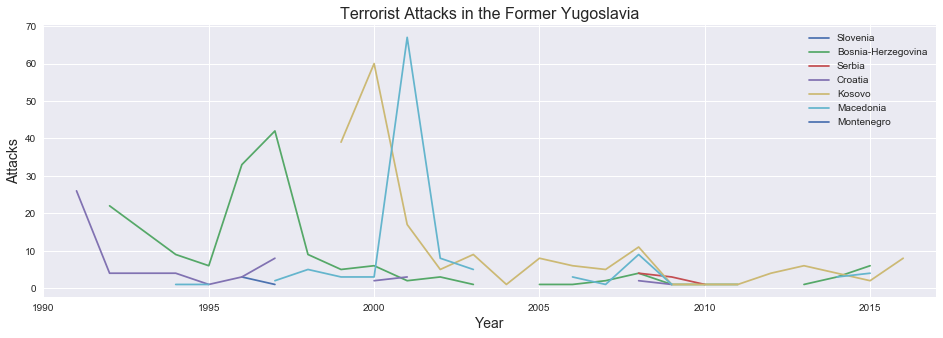

In [104]:
countries['Slovenia'].plot(kind='line',figsize=[16,5])
countries['Bosnia-Herzegovina'].plot(kind='line',figsize=[16,5])
countries['Serbia'].plot(kind='line',figsize=[16,5])
countries['Croatia'].plot(kind='line',figsize=[16,5])
countries['Kosovo'].plot(kind='line',figsize=[16,5])
countries['Macedonia'].plot(kind='line',figsize=[16,5])
countries['Montenegro'].plot(kind='line',figsize=[16,5])
plt.xlim([1990,2017])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('Terrorist Attacks in the Former Yugoslavia', size=16)
plt.show()

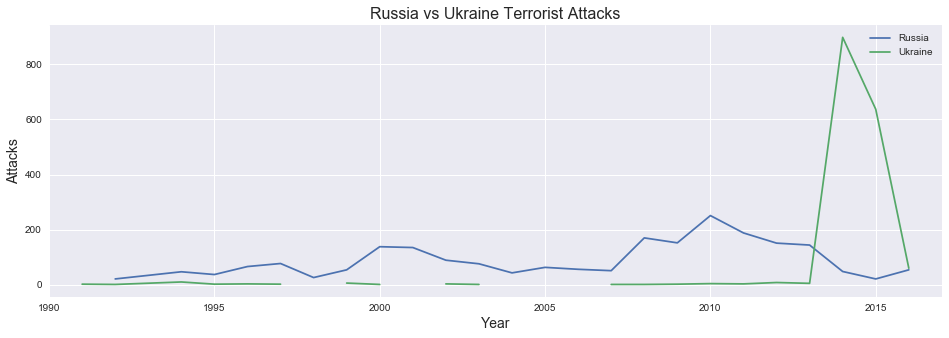

In [105]:
countries['Russia'].plot(kind='line',figsize=[16,5])
countries['Ukraine'].plot(kind='line',figsize=[16,5])
plt.xlim([1990,2017])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('Russia vs Ukraine Terrorist Attacks', size=16)
plt.show()

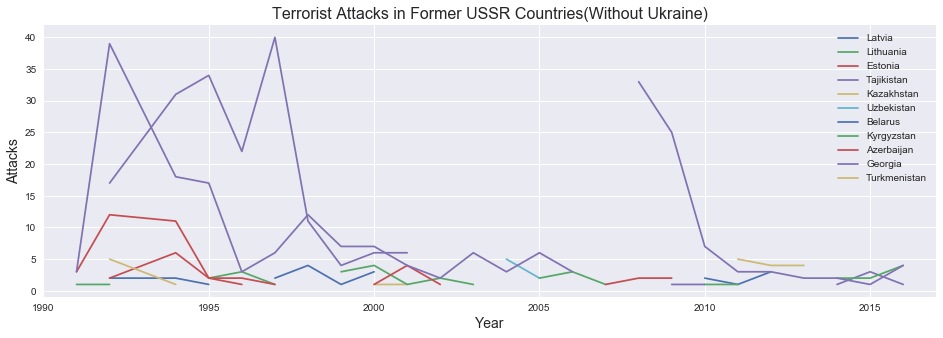

In [106]:
countries['Latvia'].plot(kind='line',figsize=[16,5])
countries['Lithuania'].plot(kind='line',figsize=[16,5])
countries['Estonia'].plot(kind='line',figsize=[16,5])
countries['Tajikistan'].plot(kind='line',figsize=[16,5])
countries['Kazakhstan'].plot(kind='line',figsize=[16,5])
countries['Uzbekistan'].plot(kind='line',figsize=[16,5])
countries['Belarus'].plot(kind='line',figsize=[16,5])
countries['Kyrgyzstan'].plot(kind='line',figsize=[16,5])
countries['Azerbaijan'].plot(kind='line',figsize=[16,5])
countries['Georgia'].plot(kind='line',figsize=[16,5])
countries['Turkmenistan'].plot(kind='line',figsize=[16,5])
plt.xlim([1990,2017])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('Terrorist Attacks in Former USSR Countries(Without Ukraine)', size=16)
plt.show()

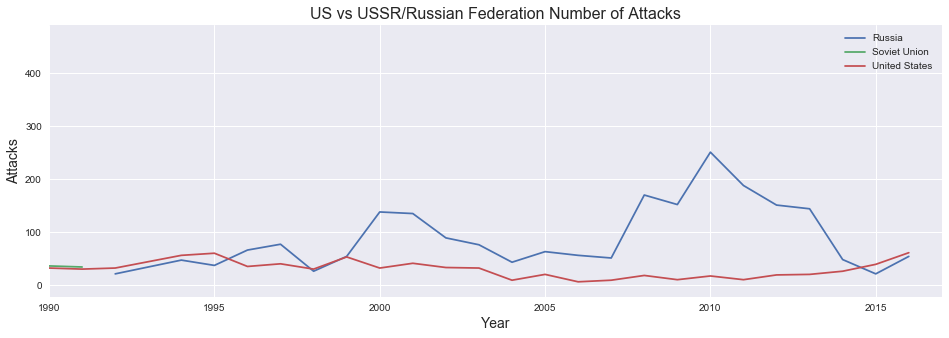

In [107]:
countries['Russia'].plot(kind='line',figsize=[16,5])
countries['Soviet Union'].plot(kind='line',figsize=[16,5])
countries['United States'].plot(kind='line',figsize=[16,5])
plt.xlim([1990,2017])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('US vs USSR/Russian Federation Number of Attacks', size=16)
plt.show()

# Bayesian Inference of Apartheid in South Africa

Having served there in the Peace Corps there and feeling a personal connection I chose to perform inference on Terrorist attacks in South Africa before and after the end of Apartheid. An important note here is that while Nelson Mandela and the official end of Apartheid was 3 years prior in 1991 the first free general elections were not until 1994 when Nelson Mandela became the nations first Black native South African President. 

While it is almost completely safe to assume that the rate of terrorist attacks in South Africa took a sharp decline after 1994 it is still a young nation with many areas of tension. Most prevalent are frequent mining strikes, a massive HIV/AIDS crisis, constant use of rioting/over zealous protests as a method of political discussion, continued massive economic inequality between whites and black South Africans, increased political tensions, and the rise of parties like the Economic Freedom Front (EFF). All of these areas provide for the possibility and rare occurrence of terrorist actions. Particularly with the EFF whose radical manifestos bear resemblance to that of Mugabe in Zimbabwe.

Since the dataset is quite small per country and even smaller when dividing it up between two time periods within one country it means that using the Bayesian approach is more useful than frequentist because we do not have to assume large sample seizes and allows us to create and determine credible parameters from our observed data.

I have set my prior to be 1994 and before since the elections were a full quarter into the year to set up my informed prior for 1995 and onward.

In [108]:
SA=pd.DataFrame(countries['South Africa'])
SA

,South Africa
year,
1970,NaN
1971,NaN
1972,NaN
1973,NaN
1974,1.0
1975,NaN
1976,1.0
1977,15.0
1978,9.0


In [109]:
#Set Up Dictionary by country name indexed by total number of attacks per year by region.
SA=data['country name'].unique()
dicti1={}
for item in SA:
    dicti1[item]=(data[data['country name']==item].groupby('year').attacktype1_txt.count())

In [110]:
SA=pd.DataFrame.from_dict(dicti1)
SA

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,12.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1,3.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,12,468,33.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,1.0,1,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,81,247,8.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,1.0,NaN
1972,NaN,NaN,1.0,NaN,NaN,NaN,15.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,

In [111]:
# SA=countries['South Africa'].unique()
# dicti2={}
# for item in SA:
#     dicti2[item]=(countries[countries['South Africa']==item].groupby('year').count())
# SA=pd.DataFrame.from_dict(dicti2)
# SA

In [112]:
SA=pd.DataFrame(countries['South Africa'])
SA

,South Africa
year,
1970,NaN
1971,NaN
1972,NaN
1973,NaN
1974,1.0
1975,NaN
1976,1.0
1977,15.0
1978,9.0


In [113]:
SA.head()

,South Africa
year,
1970,NaN
1971,NaN
1972,NaN
1973,NaN
1974,1.0


In [114]:
SouthAfrica = SA.rename(columns={'South Africa':'Attacks'})

In [115]:
SouthAfrica.columns

Index([u'Attacks'], dtype='object')

In [116]:
SouthAfrica.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016],
           dtype='int64', name=u'year')

In [117]:
SouthAfrica.head()

,Attacks
year,
1970,NaN
1971,NaN
1972,NaN
1973,NaN
1974,1.0


In [118]:
SouthAfrica.fillna(0,inplace=True)

In [119]:
SouthAfrica[:24]

,Attacks
year,
1970,0.0
1971,0.0
1972,0.0
1973,0.0
1974,1.0
1975,0.0
1976,1.0
1977,15.0
1978,9.0


In [120]:
plt.hist(SouthAfrica.Attacks)

(array([ 32.,   3.,   2.,   1.,   2.,   3.,   1.,   0.,   0.,   2.]),
 array([   0. ,   27.1,   54.2,   81.3,  108.4,  135.5,  162.6,  189.7,
         216.8,  243.9,  271. ]),
 <a list of 10 Patch objects>)

In [121]:
SA94back = SouthAfrica[:24].Attacks.values
SA95up = SouthAfrica[25:].Attacks.values

In [122]:
mean_prior_mean=SouthAfrica.Attacks.mean()
mean_prior_std=SouthAfrica.Attacks.std()

In [123]:
mean_prior_mean

43.19565217391305

In [124]:
mean_prior_std

68.33402261935848

In [125]:
!pip install pymc3
import pymc3 as pm

In [126]:
# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:

    pre_mean = pm.Normal('pre94_mean', mean_prior_mean, sd=mean_prior_std)
    post_mean = pm.Normal('post94_mean', mean_prior_mean, sd=mean_prior_std)

In [127]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    pre_std = pm.Uniform('pre94_std', lower=std_prior_lower, upper=std_prior_upper)
    post_std = pm.Uniform('post94_std', lower=std_prior_lower, upper=std_prior_upper)

In [128]:
with model:

    grouppre94 = pm.Normal('pre94', mu=pre_mean, sd=pre_std, observed=SA94back)
    grouppost94 = pm.Normal('post94', mu=post_mean, sd=post_std, observed=SA95up)

In [129]:
with model:

    diff_of_means = pm.Deterministic('difference of means', pre_mean - post_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_std - post_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_std**2 + post_std**2) / 2))

In [130]:
with model:
    trace = pm.sample(30000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 253.98:   5%|▌         | 10398/200000 [01:14<20:56, 150.93it/s]
Convergence archived at 10400
Interrupted at 10,400 [5%]: Average Loss = 260.7
100%|██████████| 30500/30500 [1:15:33<00:00,  8.09it/s]   


In [131]:
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

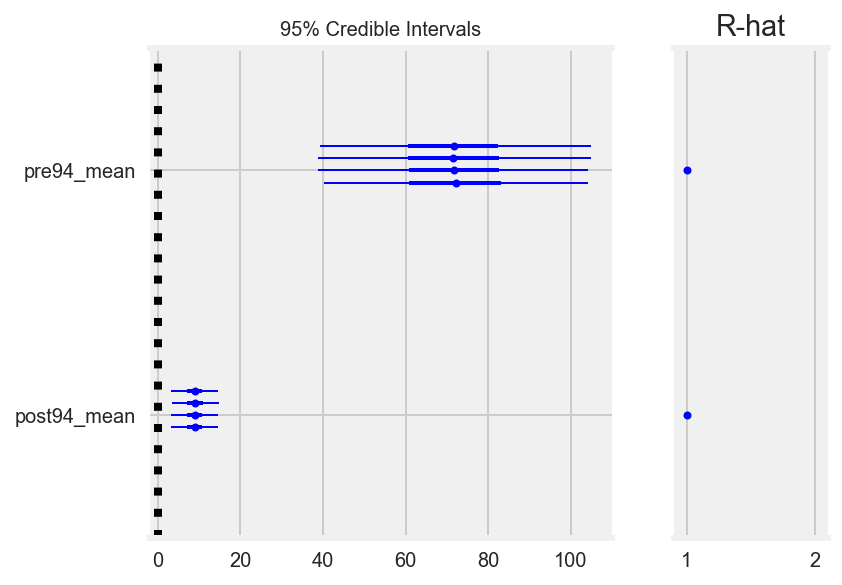

In [132]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars[:2]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1258a6150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x129221650>], dtype=object)

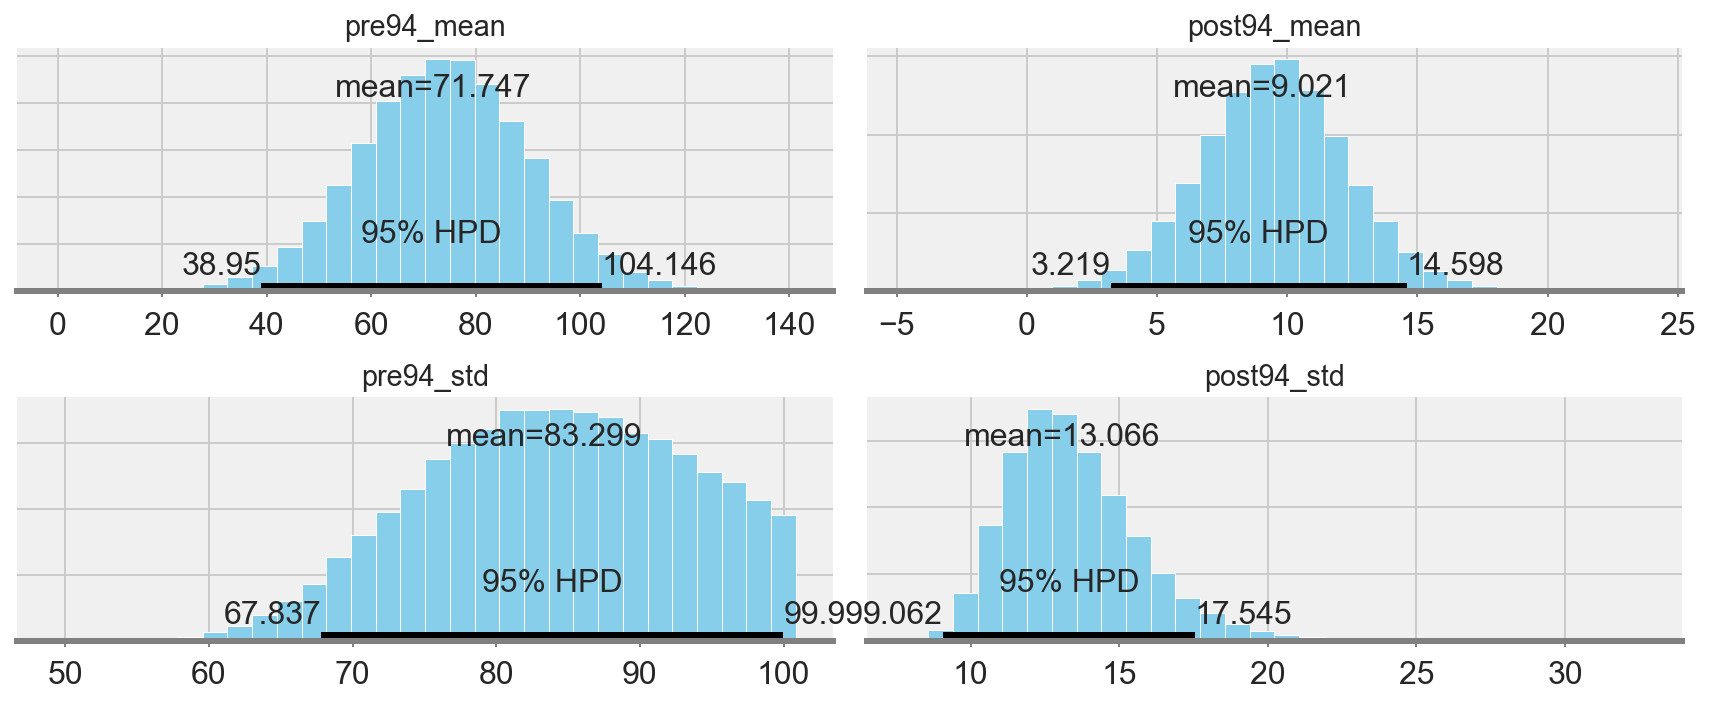

In [133]:
pm.plot_posterior(trace[3000:],
                  varnames=['pre94_mean', 'post94_mean', 'pre94_std', 'post94_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11aa53d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x129431390>], dtype=object)

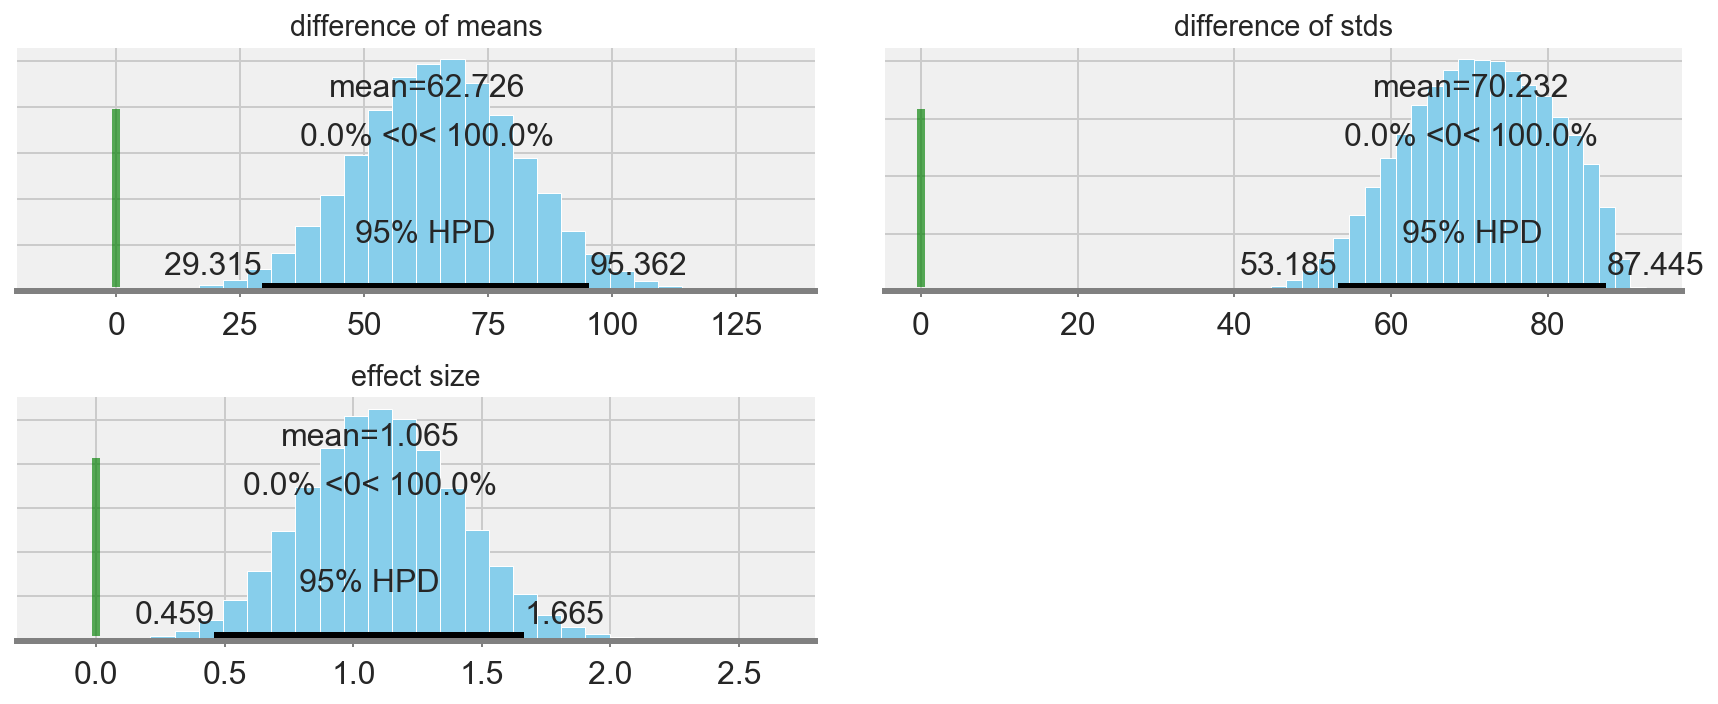

In [134]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [135]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  62.726           16.779           0.122            [29.315, 95.362]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  29.557         51.552         62.768         73.899         95.666


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  70.232           9.400            0.041            [53.185, 87.445]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  51.638         63.482         70.490         77.519         86.388


effect size:

  Mean             SD               MC Error         95% H

# End Result of Bayes

After plotting the posteriors above we can definitely see that the occurrences of terrorist attacks before and after 1994 is clearly statistically different. That difference becomes even more stark when we look at the means of pre and post 1994 where the average number of attacks drops from almost 72 a year to just over 9 a year. While this is all events in South Africa it is important to note that several groups from neighboring countries both trained South Africans how to fight during Apartheid and returned to their countries to fight after meaning while the numbers would go down in South Africa they may have risen in neighboring countries like Mozambique, Botswana, and Zimbabwe.

It also makes sense that the number of attacks would slow down because the radicals who were fighting against a free South Africa took a significant hit and lost a majority of their members due to no longer being able to fight for a status quo that showed no signs of changing. It forced them to change from a "status quo" terrorism organization to a "resistance" or "guerilla" organization.

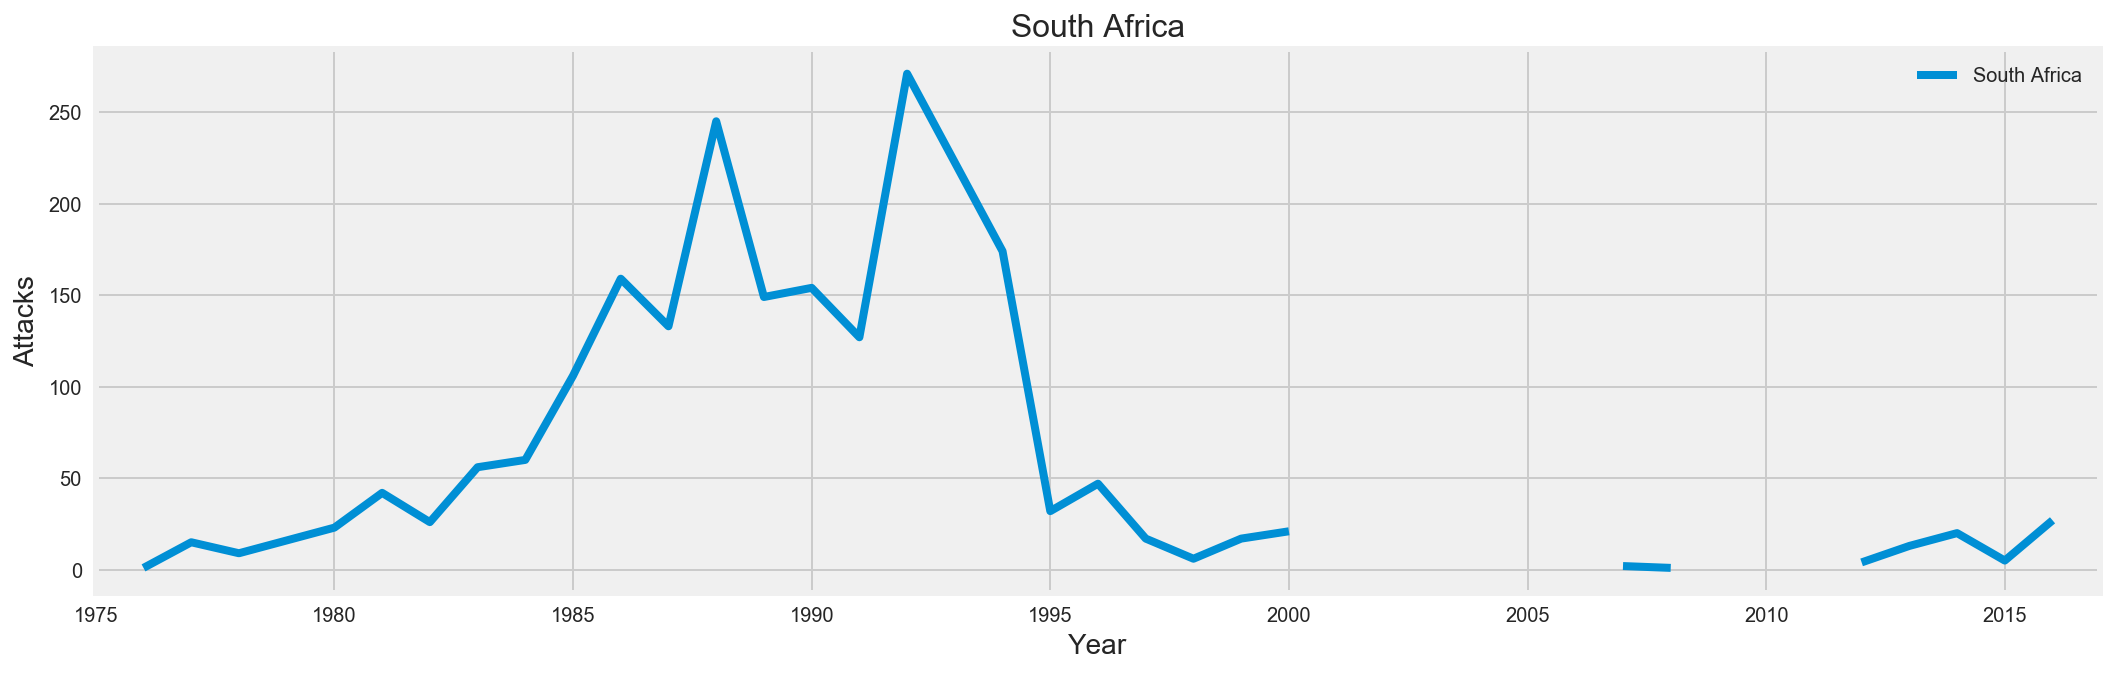

In [136]:
countries['South Africa'].plot(kind='line',figsize=[16,5])
plt.xlim([1975,2017])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('South Africa', size=16)
plt.show()

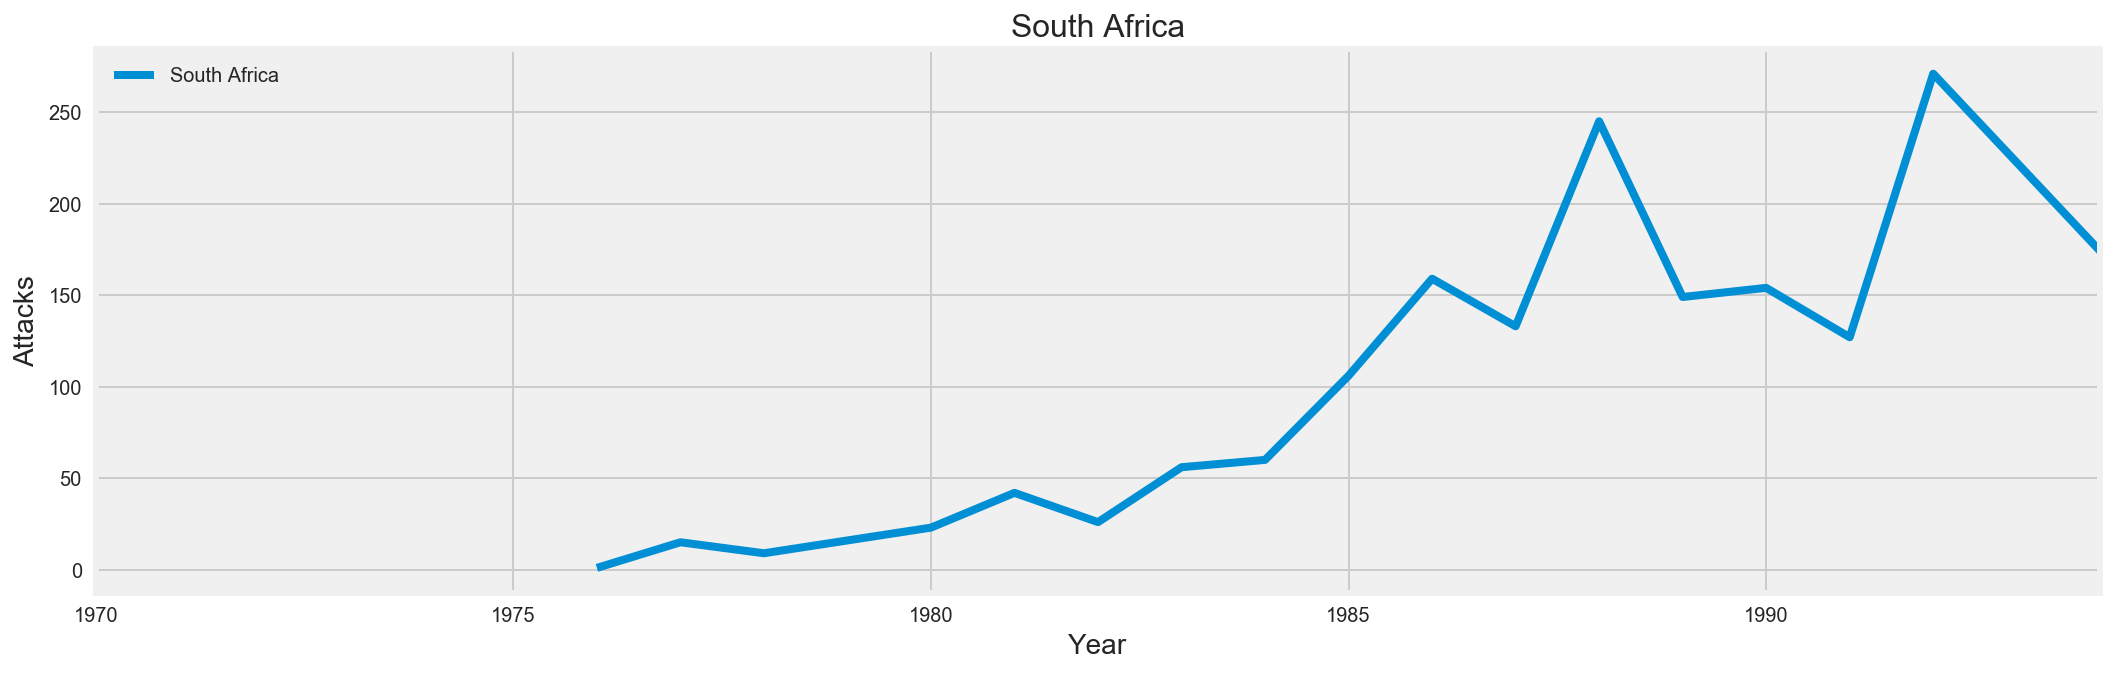

In [137]:
countries['South Africa'].plot(kind='line',figsize=[16,5])
plt.xlim([1970,1994])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('South Africa', size=16)
plt.show()

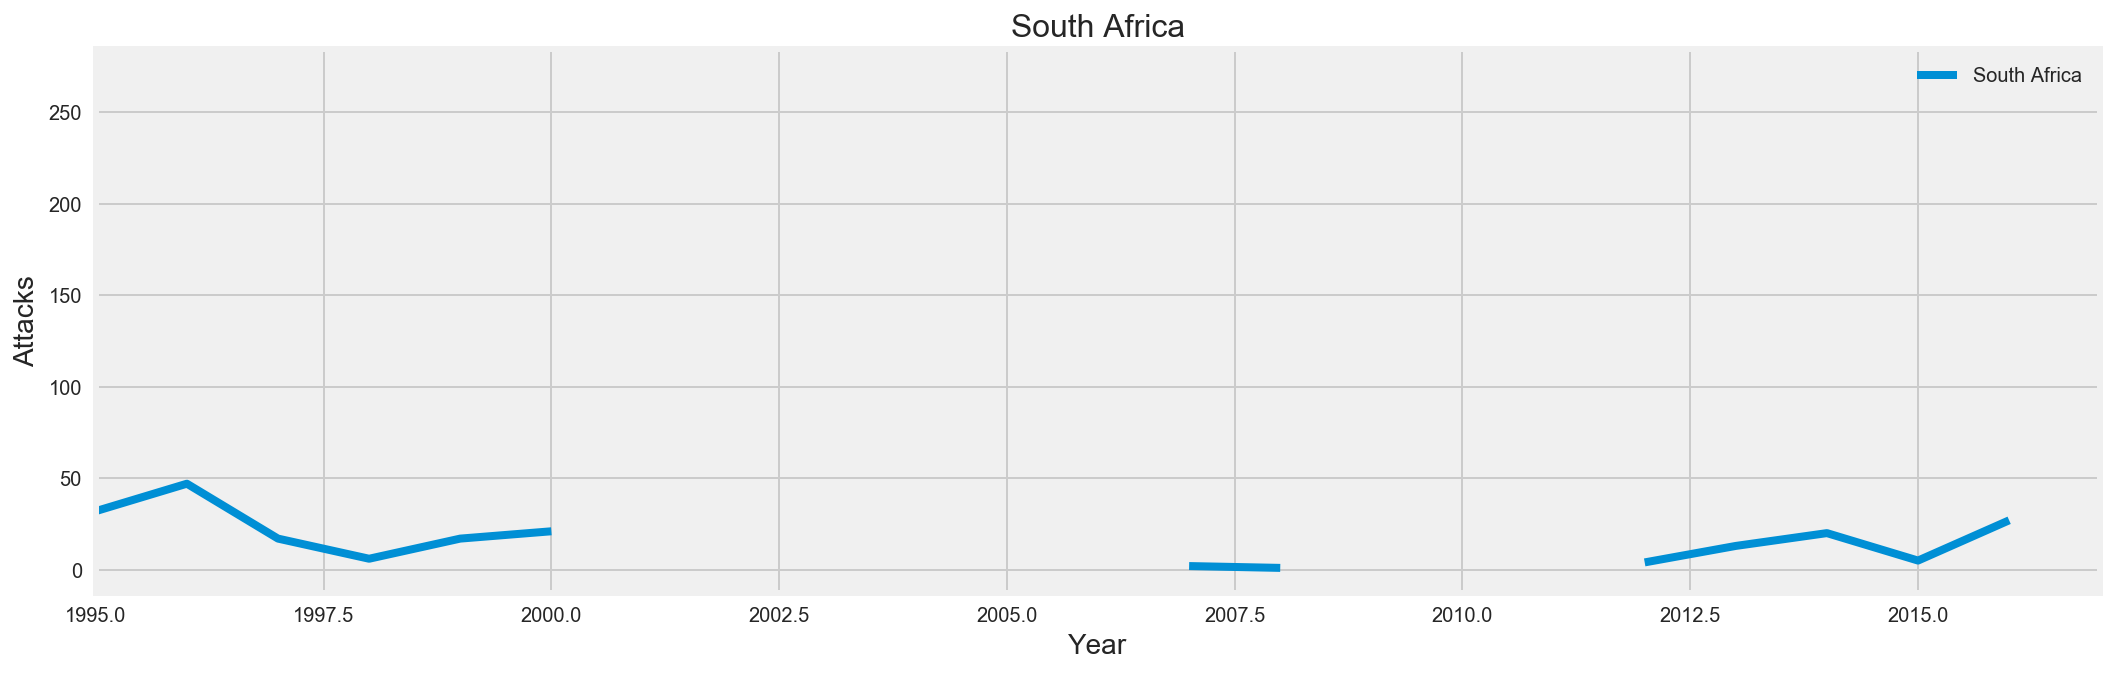

In [138]:
countries['South Africa'].plot(kind='line',figsize=[16,5])
plt.xlim([1995,2017])
plt.xlabel('Year', size=14)
plt.ylabel('Attacks', size=14)
plt.legend()
plt.title('South Africa', size=16)
plt.show()

# Solving 1993

To predict an estimate for the number of bombings in 1993 I used a rolling mean to predict those. Likely values given the values of the years before. This allows for the high use of bombs between 1970 and the late 1980s, but takes into account that the use of bombs drops as well as overall attacks in the 1990s. The parameters I ended up using were a window of 5 years from the entire time span of the dataset, 1970-2017.

After inspecting windows of 3,5, and 7 years back it appears that 7 years highest the highest correlation with its previous year and the following year. The model however, never reached stationarity and the test-statistic never got lower then the critical values no matter the change in window. As largely expected, there is not seasonality affect, which is unsurprising because bombings are not regular occurrences for most of the world’s population.

With the rolling mean method I used the rolling mean for 1992 and 1994 and averaged them, which gave me the rough estimate of 1,692 bombings in 1993.

In [139]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller

/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [140]:
df_1993 = Bombingdf[Bombingdf.year < 1993]

In [141]:
df_1993.head()

,id,year,month,day,extended,country,country name,region,region name,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,target,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,guncertain1,individual,weaptype1,weapon,fatalities,injuries
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Athens,37.983773,23.728157,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,NaN,NaN
7,197001020002,1970,1,2,0,217,United States,1,North America,Oakland,37.805065,-122.273024,1.0,0,1,1,1,1,0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Edes Substation,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
10,197001050001,1970,1,1,0,217,United States,1,North America,Baraboo,43.468500,-89.744299,1.0,0,1,1,0,1,0,0,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Badger Army ammo depot.,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0
15,197001100001,1970,1,10,0,499,East Germany (GDR),9,Eastern Europe,East Berlin,52.516667,13.400000,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,2,Government (General),NaN,NaN,Jurists Ball (Palais au Frankturm),75.0,Germany,0.0,0,6,Explosives/Bombs/Dynamite,NaN,NaN
17,197001120001,1970,1,12,0,217,United States,1,North America,New York City,40.610069,-73.947971,1.0,0,1,1,1,0,0,1,0,3,Bombing/Explosion,8,Educational Institution,49.0,School/University/Educational Building,James Madison High School,217.0,United States,0.0,0,6,Explosives/Bombs/Dynamite,0.0,0.0


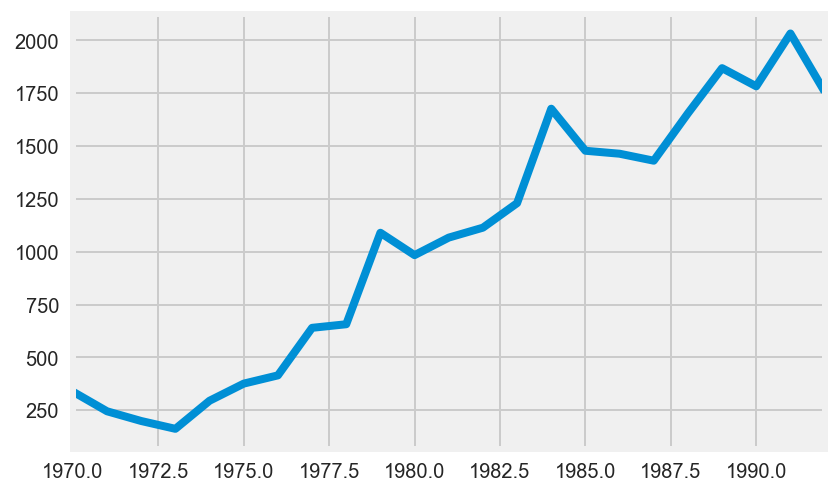

In [142]:
allbombings=df_1993['year'].value_counts().sort_index()
allbombings.plot(kind='line')

In [143]:
df_1993 = Bombingdf[(Bombingdf.year > 1970) & (Bombingdf.year <= 2016)]
X=df_1993.year.value_counts().sort_index()

/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  after removing the cwd from sys.path.
/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).std()
  """


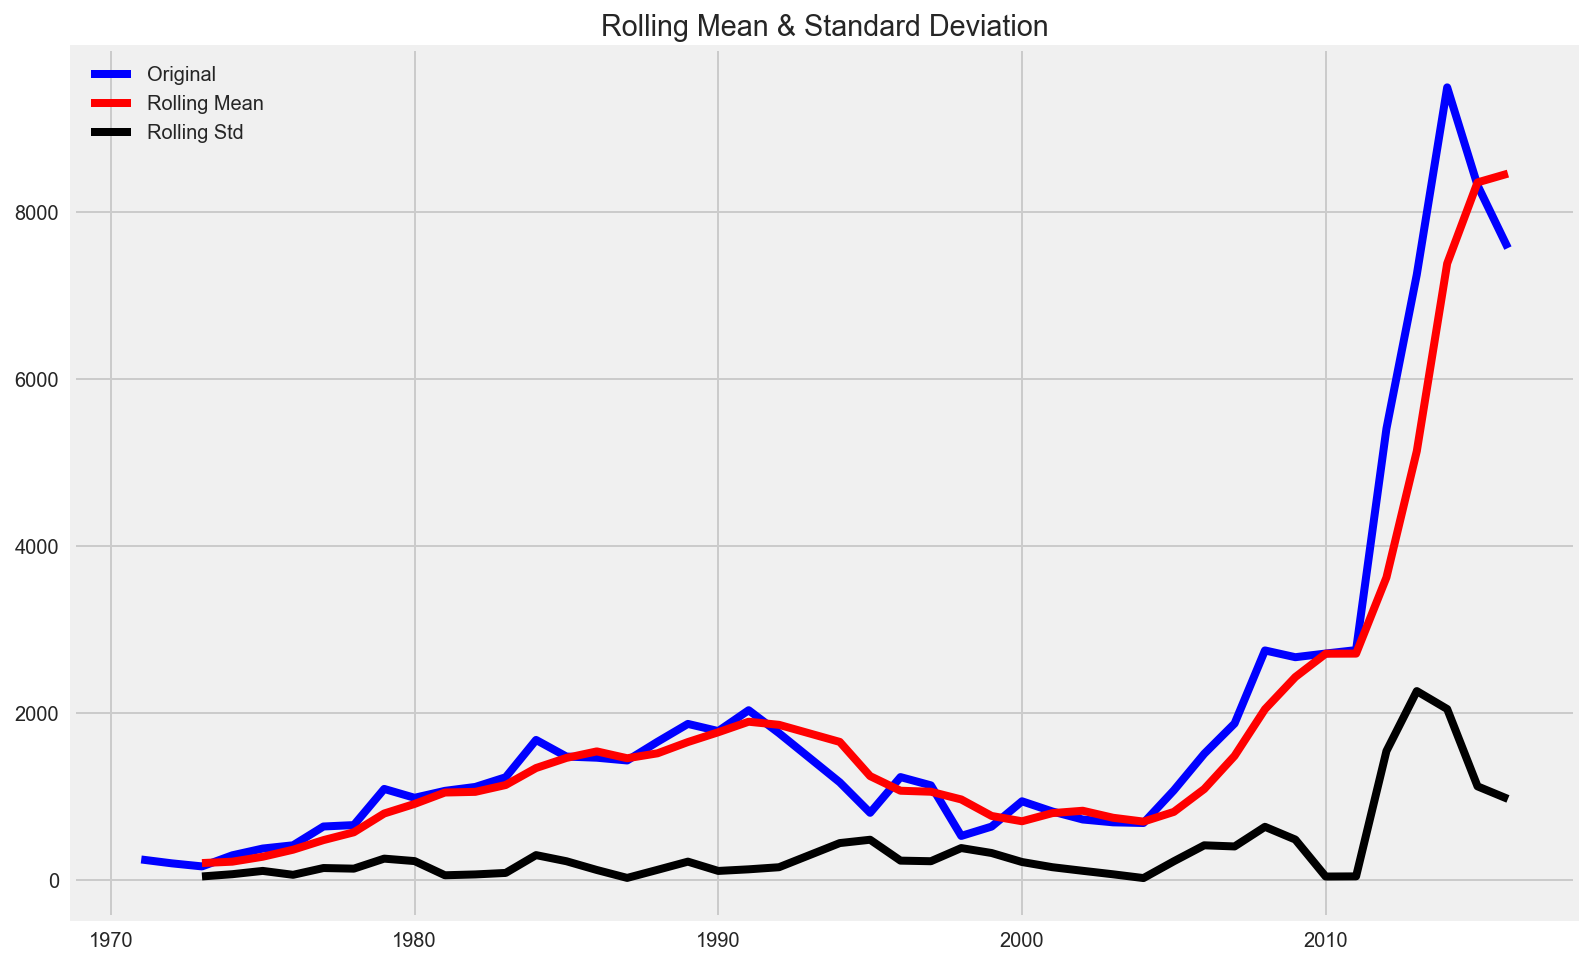

Results of Dickey-Fuller Test:
Test Statistic                 -0.683662
p-value                         0.850936
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (5%)            -2.943539
Critical Value (1%)            -3.620918
Critical Value (10%)           -2.610400
dtype: float64


/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()


1971            NaN
1972            NaN
1973     202.000000
1974     218.666667
1975     277.666667
1976     362.000000
1977     477.000000
1978     570.666667
1979     795.666667
1980     910.333333
1981    1047.000000
1982    1055.000000
1983    1137.000000
1984    1340.333333
1985    1461.666667
1986    1539.666667
1987    1457.666667
1988    1516.666667
1989    1651.666667
1990    1769.000000
1991    1895.000000
1992    1858.000000
1994    1653.333333
1995    1243.666667
1996    1068.333333
1997    1056.333333
1998     964.000000
1999     766.333333
2000     702.666667
2001     800.333333
2002     828.666667
2003     744.666667
2004     698.666667
2005     815.000000
2006    1088.666667
2007    1486.000000
2008    2044.666667
2009    2430.333333
2010    2709.666667
2011    2711.000000
2012    3623.666667
2013    5137.333333
2014    7384.333333
2015    8355.666667
2016    8461.000000
Name: year, dtype: float64

In [144]:
def test_stationarity(timeseries, windownumber):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=windownumber)
    rolstd = pd.rolling_std(timeseries, window=windownumber)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
#     Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 
    return pd.rolling_mean(timeseries, window=windownumber)

# perform test
test_stationarity(X, 3)

/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  after removing the cwd from sys.path.
/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  """


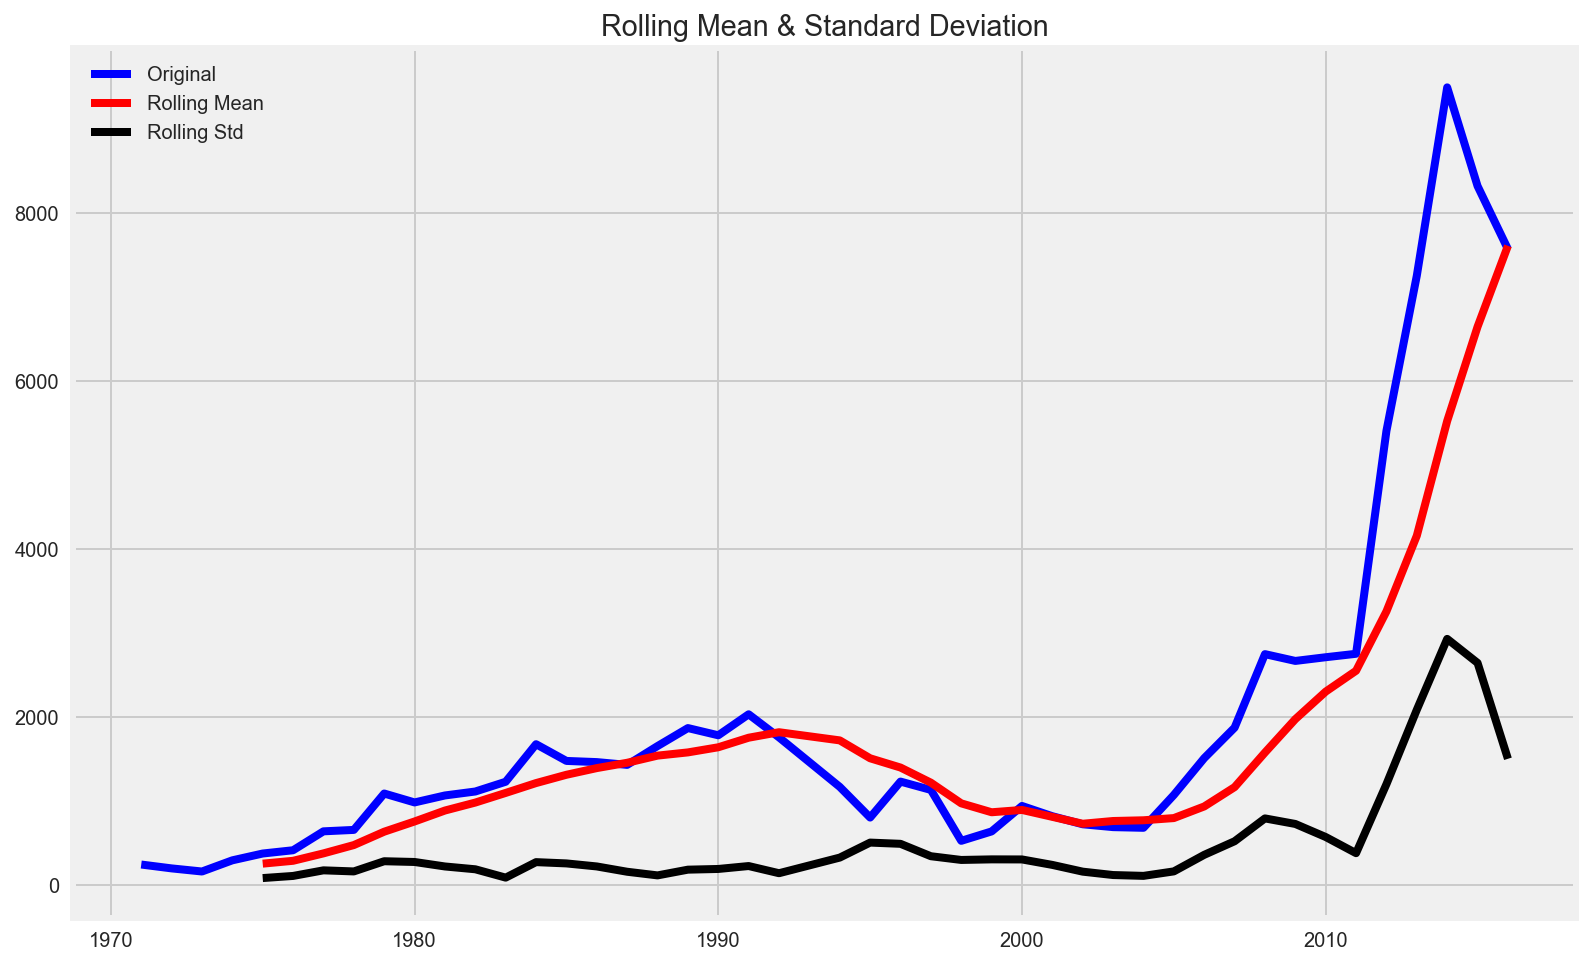

Results of Dickey-Fuller Test:
Test Statistic                 -0.683662
p-value                         0.850936
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (5%)            -2.943539
Critical Value (1%)            -3.620918
Critical Value (10%)           -2.610400
dtype: float64


/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()


1971       NaN
1972       NaN
1973       NaN
1974       NaN
1975     255.4
1976     289.4
1977     377.6
1978     476.6
1979     635.6
1980     757.2
1981     887.6
1982     982.4
1983    1097.0
1984    1214.4
1985    1313.2
1986    1392.6
1987    1456.0
1988    1541.0
1989    1579.4
1990    1640.4
1991    1754.2
1992    1819.6
1994    1722.4
1995    1509.4
1996    1399.2
1997    1219.2
1998     973.0
1999     867.0
2000     894.6
2001     812.2
2002     730.4
2003     763.0
2004     771.6
2005     797.8
2006     936.0
2007    1166.0
2008    1577.8
2009    1975.0
2010    2302.8
2011    2551.2
2012    3257.6
2013    4158.4
2014    5523.6
2015    6645.2
2016    7608.4
Name: year, dtype: float64

In [145]:
test_stationarity(X, 5)

/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  """


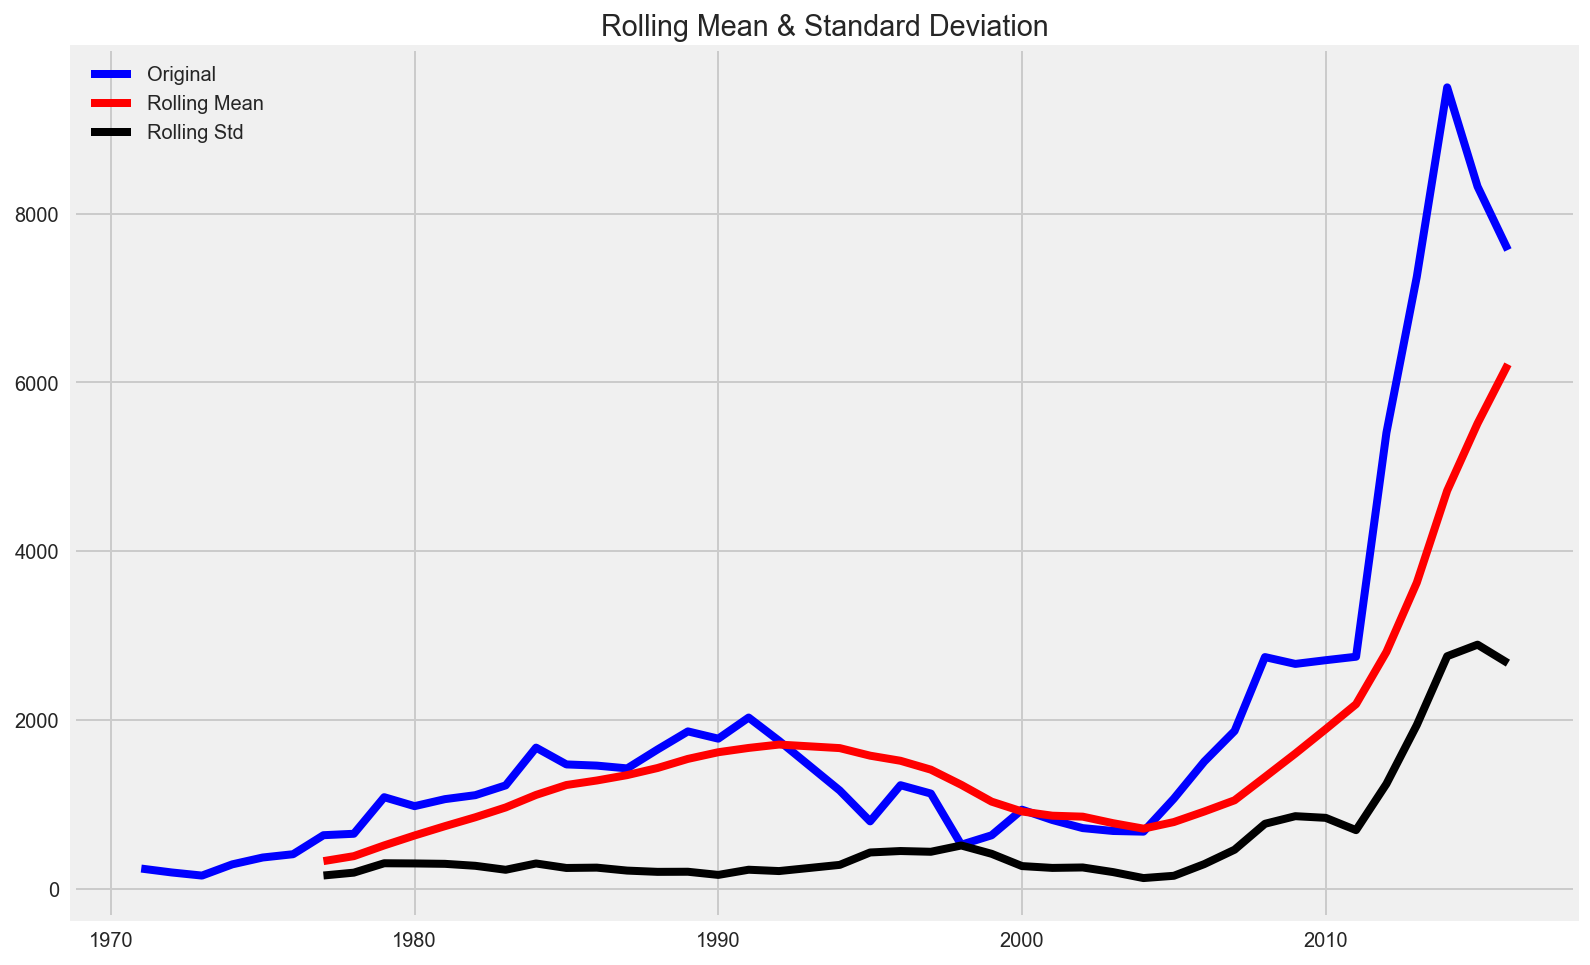

Results of Dickey-Fuller Test:
Test Statistic                 -0.683662
p-value                         0.850936
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (5%)            -2.943539
Critical Value (1%)            -3.620918
Critical Value (10%)           -2.610400
dtype: float64


/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()


1971            NaN
1972            NaN
1973            NaN
1974            NaN
1975            NaN
1976            NaN
1977     333.142857
1978     392.000000
1979     519.285714
1980     636.714286
1981     747.000000
1982     852.428571
1983     968.857143
1984    1117.000000
1985    1234.285714
1986    1287.714286
1987    1351.571429
1988    1435.571429
1989    1543.428571
1990    1622.428571
1991    1673.285714
1992    1713.285714
1994    1671.142857
1995    1581.571429
1996    1521.142857
1997    1416.000000
1998    1236.571429
1999    1037.428571
2000     920.857143
2001     871.000000
2002     859.571429
2003     782.142857
2004     717.714286
2005     795.714286
2006     920.285714
2007    1053.428571
2008    1329.000000
2009    1606.714286
2010    1895.571429
2011    2191.428571
2012    2810.428571
2013    3630.714286
2014    4719.285714
2015    5515.142857
2016    6215.285714
Name: year, dtype: float64

In [146]:
test_stationarity(X, 7)

In [147]:
print "Total Average is", (333+392+519+636+747+852+968+1117+1234+1287+1351+1435+1543+1622+1673+1713+1671+1581+1521+1416+1236+1037+920+871+859+782+717+795+920+1053+1329+1606+1895+2191+2810+3630+4719+5515+6215)/46
print "1993 had Around", (1671.14+1713.29)/2,"bombings"

Total Average is 1363
1993 had Around 1692.215 bombings


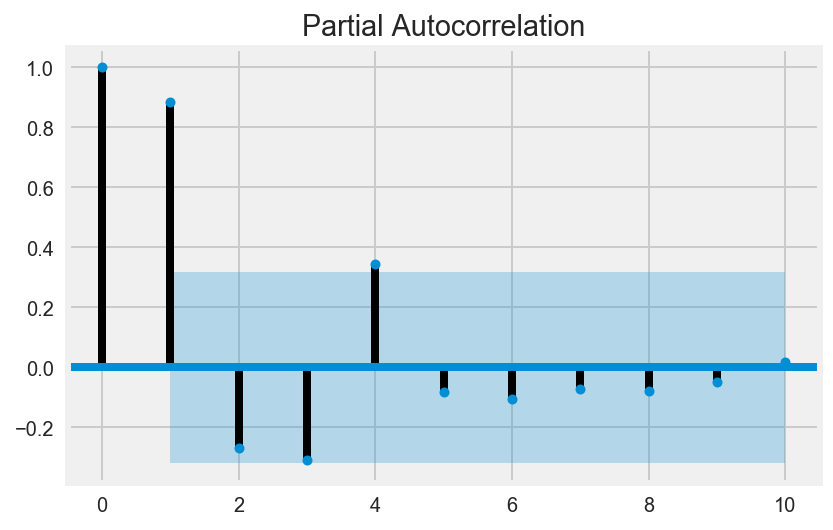

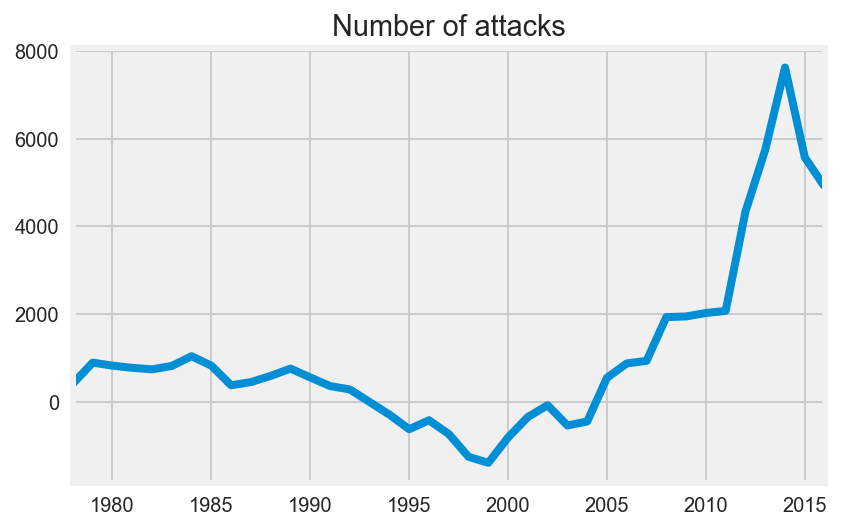

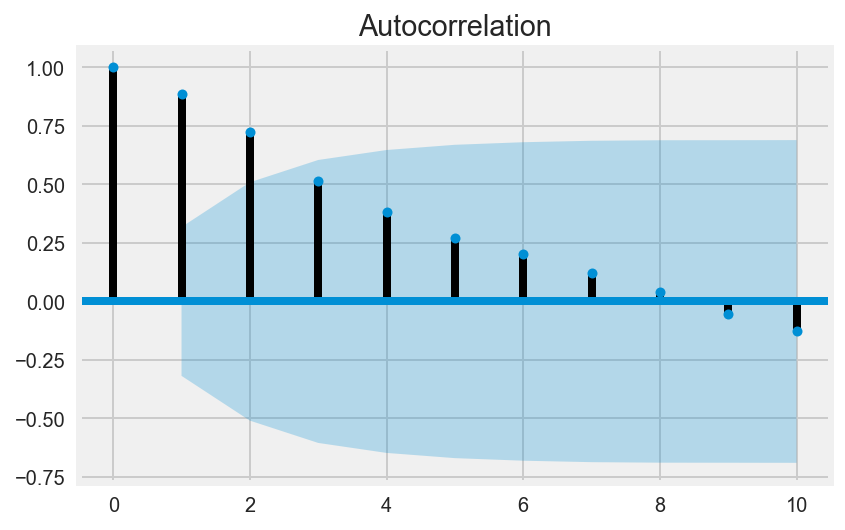

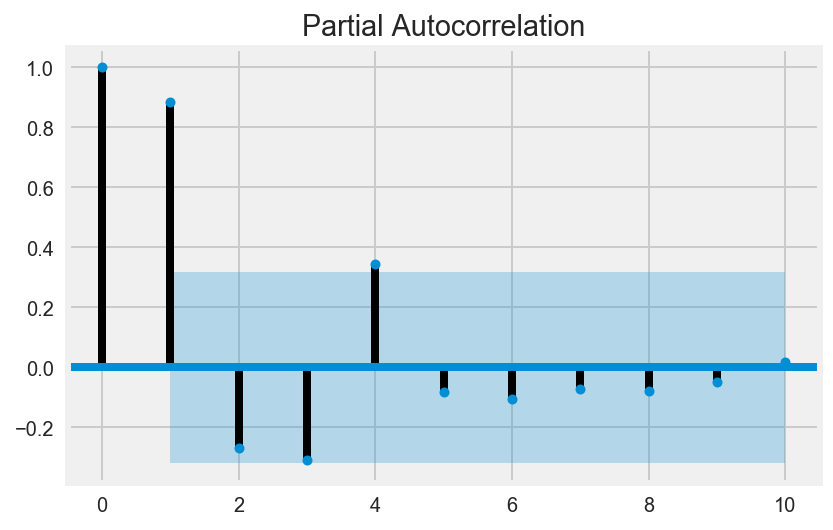

In [148]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Run ACF and PCF to see how autocorrelated things are and where to make
#possible changes in the future.

diff0 = X.diff(periods=7)[7:]
diff0.plot(title='Number of attacks')
plot_acf(diff0, lags=10)
plot_pacf(diff0, lags=10)